<a href="https://colab.research.google.com/github/dwp28/Actividad2-Desafio_Iris-IA/blob/main/desafio_iris_Actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ACTIVIDAD 2 IA - DESAFÍO IRIS

## Fase 1: Exploración del Jardín Botánico (Análisis de Datos)

In [2]:
#Importamos las librerías
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargamos el dataset iris
iris = sklearn.datasets.load_iris()

In [4]:
# Creamos un DataFrame con las características
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadimos una columna con las especies
df["species"] = iris.target

# Los números 0, 1, 2 corresponden a las especies reales (las traducimos)
df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

# Mostramos las primeras filas para ver cómo son los datos
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Información general sobre el dataset
df.info()

print("-"*100)
# Estadísticas básicas de las columnas numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
----------------------------------------------------------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


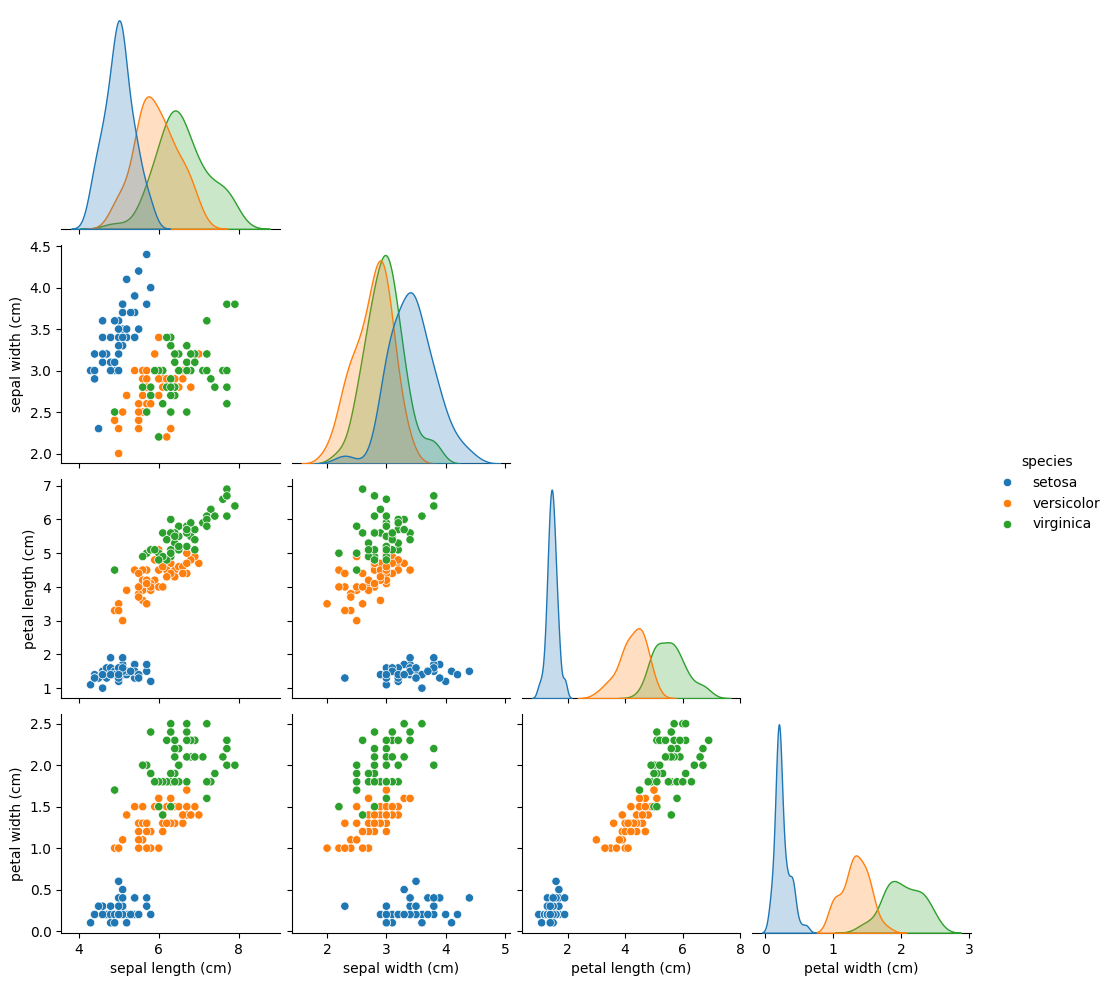

In [6]:
# Pairplot para ver la relación entre todas las variables
sns.pairplot(df, hue="species", corner = True)
plt.show()

**Pregunta de Análisis 1** --> Sí, al ver el pairplot se nota que la especie setosa está claramente separada del resto, sobre todo si miramos las variables del pétalo (largo y ancho). Las otras dos (versicolor y virginica) parecen estar más mezcladas, aunque también se pueden distinguir un poco. Así que sí, algunas especies se separan fácilmente, pero otras no tanto.

--------------------------------------------

Sí, definitivamente se observa que las especies forman grupos visualmente separables, aunque con distintos grados de separación:

Separación entre especies:

- **Setosa**: Forma grupos claramente separados y compactos en todos los gráficos, especialmente en aquellos que involucran medidas de pétalos. Es la especie más fácil de distinguir.

- **Versicolor y Virginica**: Se separan razonablemente bien en los gráficos de pétalos, pero muestran cierto solapamiento en los gráficos que involucran sépalos.

Patrones observados:

- **Los pétalos son más discriminantes**: Los gráficos que combinan "petal length" y "petal width" muestran la mejor separación entre las tres especies.

- **Los sépalos son menos útiles**: Especialmente en "sepal width", las especies versicolor y virginica se solapan significativamente.

- **Setosa es única**: Tiene pétalos notablemente más pequeños que las otras dos especies, lo que la hace inmediatamente identificable.

Conclusión visual:
La intuición visual sugiere que un algoritmo debería poder clasificar estas especies con buena precisión, especialmente utilizando las características de los pétalos. La setosa será la más fácil de clasificar, mientras que distinguir entre versicolor y virginica podría presentar más desafíos.

# PARTE A: APRENDIZAJE SUPERVISADO

## Fase 2: Entrenamiento del Clasificador

En aprendizaje supervisado siempre separamos los datos en:

X → las características (inputs, lo que el modelo usa para aprender)

y → la etiqueta (output, lo que queremos que prediga)

In [20]:
dir(sklearn)

['calibration',
 'clone',
 'cluster',
 'compose',
 'config_context',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'discriminant_analysis',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'frozen',
 'gaussian_process',
 'get_config',
 'impute',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'set_config',
 'show_versions',
 'svm',
 'tree']

In [16]:
from sklearn import model_selection
dir(model_selection)

['BaseCrossValidator',
 'BaseShuffleSplit',
 'FixedThresholdClassifier',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold',
 'LearningCurveDisplay',
 'LeaveOneGroupOut',
 'LeaveOneOut',
 'LeavePGroupsOut',
 'LeavePOut',
 'ParameterGrid',
 'ParameterSampler',
 'PredefinedSplit',
 'RandomizedSearchCV',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'ShuffleSplit',
 'StratifiedGroupKFold',
 'StratifiedKFold',
 'StratifiedShuffleSplit',
 'TimeSeriesSplit',
 'TunedThresholdClassifierCV',
 'ValidationCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classification_threshold',
 '_plot',
 '_search',
 '_split',
 '_validation',
 'check_cv',
 'cross_val_predict',
 'cross_val_score',
 'cross_validate',
 'learning_curve',
 'permutation_test_score',
 'train_test_split',
 'typing',
 'validation_curve']

In [19]:
# Ver documentación completa de una función
help(train_test_split)

# O más rápido:
train_test_split?

# Ver parámetros de un clasificador
help(DecisionTreeClassifier)

from sklearn import metrics
# Ver todas las métricas disponibles
help(metrics.accuracy_score)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [7]:
# Separamos los datos en características (X) y etiquetas (y)
X = df.drop('species', axis=1)  # quitamos la columna species
y = df['species']               # solo nos quedamos con la columna species

In [9]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Comprobamos de tamaños para ver que esta bien dividido
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


X_train: (120, 4) X_test: (30, 4)
y_train: (120,) y_test: (30,)


In [10]:
# Creamos y entrenamos el clasificador (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)  # random_state para reproducibilidad
clf.fit(X_train, y_train)

print("Entrenamiento completado.")


Entrenamiento completado.


In [12]:
# Predecimos sobre X_test y calculamos la precisión
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision en el conjunto de prueba: {accuracy:.4f}")

Precision en el conjunto de prueba: 0.9333


**Pregunta de Análisis 2 -->**
La precisión obtenida en el conjunto de prueba fue **0.9333**.

A mi parecer, el modelo funciona bien si la precisión es alta (por ejemplo > 0.9). Esto ocurre porque en el dataset Iris algunas características (sobre todo *petal length* y *petal width*) separan bastante bien las especies; por ejemplo *setosa* suele ser fácil de distinguir.

El algoritmo pudo aprender porque le dimos ejemplos etiquetados (es decir, características + la especie correcta) durante el entrenamiento. Con esos ejemplos, el árbol de decisión encontró reglas (umbrales en las medidas) que permiten separar las clases.

# PARTE B: APRENDIZAJE NO SUPERVISADO

## Fase 3: Descubrimiento de Grupos con K-Means